In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2, f_classif, VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Without any feature selection

In [17]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
initial_accuracy = accuracy_score(y_test, y_pred)
print(f'Initial Model Accuracy: {initial_accuracy:.4f}')

Initial Model Accuracy: 0.9708


### Duplicate Feature Removed if-any

In [19]:
X_unique = X.loc[:, ~X.columns.duplicated()]
X_train_unique, X_test_unique = train_test_split(X_unique, test_size=0.3, random_state=42)

### Chi square Test

In [20]:
chi2_selector = SelectKBest(chi2, k=10)
X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)
X_test_chi2 = chi2_selector.transform(X_test)

### Correlation

In [21]:
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

X_train_corr = X_train.drop(columns=to_drop)
X_test_corr = X_test.drop(columns=to_drop)

### ANOVA

In [22]:
anova_selector = SelectKBest(f_classif, k=10)
X_train_anova = anova_selector.fit_transform(X_train, y_train)
X_test_anova = anova_selector.transform(X_test)

### Variance Threshold

In [23]:
variance_selector = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_train_var = variance_selector.fit_transform(X_train)
X_test_var = variance_selector.transform(X_test)

In [24]:
def evaluate_model(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Initial dataset
print(f'Initial Model Accuracy: {initial_accuracy:.4f}')

# After removing duplicates
accuracy_unique = evaluate_model(X_train_unique, X_test_unique, y_train, y_test)
print(f'Accuracy after removing duplicates: {accuracy_unique:.4f}')

# Chi-Squared Test
accuracy_chi2 = evaluate_model(X_train_chi2, X_test_chi2, y_train, y_test)
print(f'Accuracy after Chi-Squared Test: {accuracy_chi2:.4f}')

# Correlation
accuracy_corr = evaluate_model(X_train_corr, X_test_corr, y_train, y_test)
print(f'Accuracy after Correlation Threshold: {accuracy_corr:.4f}')

# ANOVA
accuracy_anova = evaluate_model(X_train_anova, X_test_anova, y_train, y_test)
print(f'Accuracy after ANOVA F-test: {accuracy_anova:.4f}')

# Variance Threshold
accuracy_var = evaluate_model(X_train_var, X_test_var, y_train, y_test)
print(f'Accuracy after Variance Threshold: {accuracy_var:.4f}')

Initial Model Accuracy: 0.9708
Accuracy after removing duplicates: 0.9708
Accuracy after Chi-Squared Test: 0.9649
Accuracy after Correlation Threshold: 0.9649
Accuracy after ANOVA F-test: 0.9474
Accuracy after Variance Threshold: 0.9591


<ipython-input-25-0c053cae9913>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='Accuracy', data=accuracy_df, palette='viridis')


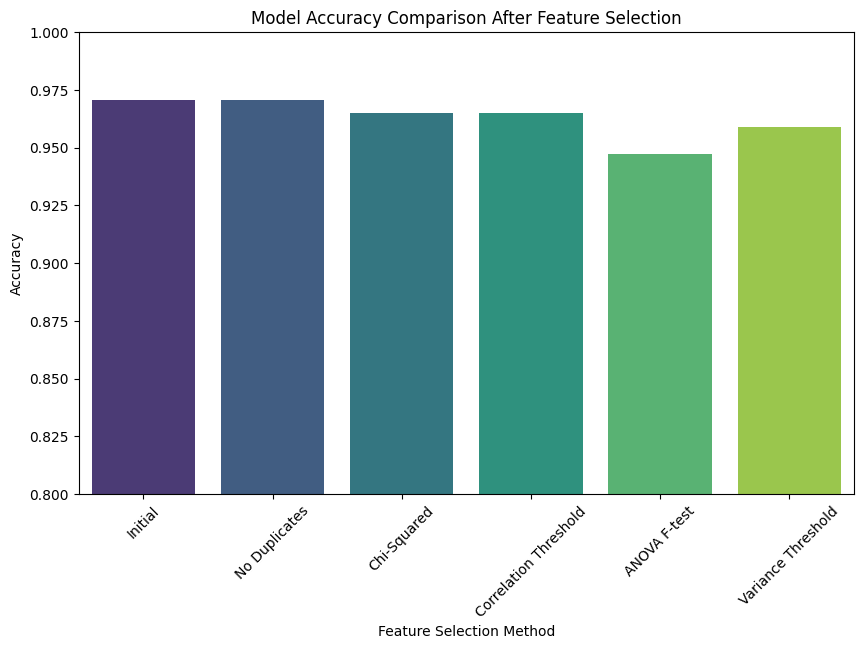

In [25]:
accuracies = {
    'Initial': initial_accuracy,
    'No Duplicates': accuracy_unique,
    'Chi-Squared': accuracy_chi2,
    'Correlation Threshold': accuracy_corr,
    'ANOVA F-test': accuracy_anova,
    'Variance Threshold': accuracy_var
}
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Method', 'Accuracy'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Method', y='Accuracy', data=accuracy_df, palette='viridis')
plt.title('Model Accuracy Comparison After Feature Selection')
plt.xlabel('Feature Selection Method')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45)
plt.show()